In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn
import warnings
warnings.filterwarnings('ignore')
import re
import matplotlib.style as style
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\JOHN ACQUAH\\Documents\\BLOSSOM ACADEMY\\projects\\Loan Prediction Project data'

In [3]:
ls

 Volume in drive C is Windows
 Volume Serial Number is F0C8-BB96

 Directory of C:\Users\JOHN ACQUAH\Documents\BLOSSOM ACADEMY\projects\Loan Prediction Project data

11/23/2021  11:16 AM    <DIR>          .
11/23/2021  11:16 AM    <DIR>          ..
11/20/2021  08:56 AM    <DIR>          .ipynb_checkpoints
11/13/2021  01:37 PM           664,447 Final Loan prediction project(JOHN ACQUAH) GRID SEARCH-Copy2.ipynb
11/19/2021  01:08 PM           689,314 Final Loan prediction project(JOHN ACQUAH).ipynb
11/22/2021  09:39 PM           701,015 Final Loan prediction project(JOHN ACQUAH)-Copy1.ipynb
11/04/2021  12:59 PM           561,001 Loan prediction project(PCA)-Copy1.ipynb
09/09/2021  09:55 AM        21,041,664 Loans data.csv
11/23/2021  11:16 AM           675,367 new.ipynb
11/20/2021  09:04 AM           563,743 new-Copy1.ipynb
09/22/2021  08:40 PM            57,787 Untitled1.ipynb
11/04/2021  03:01 PM           140,315 Untitled2.ipynb
               9 File(s)     25,094,653 bytes
           

In [4]:
lpd = pd.read_csv('Loans data.csv')

In [5]:
lpd.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Loan Refused,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Loan Refused,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Loan Refused,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Loan Refused,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Loan Refused,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [6]:
lpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  float64
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

### Converting object column into integer column
It can be seen that 'Maximum Open Credit' and 'Years in current job'is an object per the information above. But in the data it is represented by numbers.
Here it has to be converted from an object to an integer column using the to_numeric approach.



In [7]:
lpd['Maximum Open Credit'][4930]    # the string character 'VAlUE' in the column was the reason it was seen as an object

'#VALUE!'

Since the location of the above output was unknown, an error message led to finding the index.

In [8]:
lpd['Maximum Open Credit'].replace('#VALUE!',np.nan, inplace = True)
# replacing it with nan 

In [9]:
lpd['Maximum Open Credit'][4930]
# calling its index to comfirm change

nan

In [10]:
lpd['Maximum Open Credit']=pd.to_numeric(lpd['Maximum Open Credit'])
# changing the data type from string to a numeric data type

In [11]:
lpd['Years in current job'].head()

0     < 1 year
1    10+ years
2      9 years
3      3 years
4    10+ years
Name: Years in current job, dtype: object

'<','+','years' will be removed in order to convert the column to that of a integer dtype.

In [12]:
lpd['Years in current job']=lpd['Years in current job'].str.replace(
    '<','',).str.replace('+','').str.replace('year','').str.replace('s','').astype('float')


In [13]:
lpd['Years in current job'].head()

0     1.0
1    10.0
2     9.0
3     3.0
4    10.0
Name: Years in current job, dtype: float64

In [14]:
lpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  float64
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  float64
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

Ther dtype of the column has changed from object to float

Displaying a desciption of numerical variables in the data.

In [15]:
lpd.describe()

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.111070e+05,89769.000000,106414.000000,8.976900e+04,111107.000000,111107.000000,52104.000000,111107.000000,111107.000000,1.111070e+05,1.111050e+05,110879.00000,111096.000000
mean,1.147718e+07,1075.795029,5.974308,7.248600e+04,971.970120,18.201003,34.902272,11.125105,0.168027,1.548314e+04,3.438644e+04,0.11766,0.029353
std,3.185508e+07,1474.133505,3.500436,5.593094e+04,641.640829,7.014495,21.970696,5.010267,0.484212,1.982115e+04,3.643027e+05,0.35142,0.260575
min,4.910000e+02,585.000000,1.000000,4.033000e+03,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000
25%,8.162000e+03,705.000000,3.000000,4.468800e+04,537.755000,13.500000,16.000000,8.000000,0.000000,5.905000e+03,1.241700e+04,0.00000,0.000000
50%,1.418300e+04,724.000000,6.000000,6.175200e+04,852.720000,16.900000,32.000000,10.000000,0.000000,1.102700e+04,2.124300e+04,0.00000,0.000000
75%,2.382200e+04,741.000000,10.000000,8.688700e+04,1262.630000,21.700000,51.000000,14.000000,0.000000,1.933800e+04,3.558400e+04,0.00000,0.000000
max,1.000000e+08,7510.000000,10.000000,8.713547e+06,22939.120000,70.500000,176.000000,76.000000,15.000000,1.730472e+06,6.998809e+07,7.00000,15.000000


Summary description of categorical variables.

In [16]:
lpd.describe(include = 'object')

,Loan ID,Customer ID,Loan Status,Term,Home Ownership,Purpose
count,111107,111107,111107,111107,111107,111107
unique,88910,88910,2,2,4,16
top,0ef1cefe-875c-47c2-98fe-5d91c53d102f,a03a3a7e-831b-4b39-aa33-bfd839398340,Loan Given,Short Term,Home Mortgage,Debt Consolidation
freq,2,2,85934,80274,53818,87277


Displaying the shape of the data.

In [17]:
lpd.shape

(111107, 19)

The data contains 111107 rows or observations and 19 features or attributes


#### Checking the sum of missing values in each feature

In [18]:
lpd.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      228
Tax Liens                          11
dtype: int64

It casn be seen from the information above that 6 of the 19 features has missing values

#### Counting values and proportions of of values under categorical variables

Defining a function to to count and plot categories in the categorical features

In [19]:
def object_type_count(lpd,feature_name):
    """
    This will help know values available in an object('categories'), 
    type of features and return categorical values with count and proportion
    INPUT: Enter the name of the dataset and the specific feature
    OUTPUT: Returns value counts of items in categorical feature, corresponding
    proportions, and the barchart.
    """
    
    
    if lpd[feature_name].dtype=='object':
        print(lpd[feature_name].value_counts())
        print(lpd[feature_name].value_counts(normalize = True))
        lpd[feature_name].value_counts().plot.bar()

Loan Given      85934
Loan Refused    25173
Name: Loan Status, dtype: int64
Loan Given      0.773435
Loan Refused    0.226565
Name: Loan Status, dtype: float64


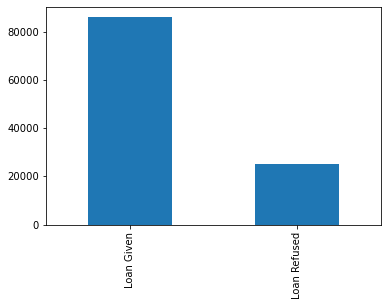

In [20]:
object_type_count(lpd,'Loan Status')

Loan status contains 2 different categories. Loans Given and Loan Refused. Loans given made up 77% of the total loans status and 23% of loans refused

Short Term    80274
Long Term     30833
Name: Term, dtype: int64
Short Term    0.722493
Long Term     0.277507
Name: Term, dtype: float64


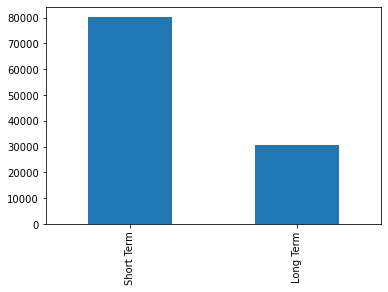

In [21]:
object_type_count(lpd,'Term')


Term contains 2 categories. 72% for short term and 28% for long term.

Debt Consolidation      87277
other                    6671
Home Improvements        6504
Other                    3595
Business Loan            1749
Buy a Car                1422
Medical Bills            1259
Buy House                 758
Take a Trip               622
major_purchase            407
small_business            318
moving                    167
wedding                   126
Educational Expenses      114
vacation                  107
renewable_energy           11
Name: Purpose, dtype: int64
Debt Consolidation      0.785522
other                   0.060041
Home Improvements       0.058538
Other                   0.032356
Business Loan           0.015742
Buy a Car               0.012798
Medical Bills           0.011331
Buy House               0.006822
Take a Trip             0.005598
major_purchase          0.003663
small_business          0.002862
moving                  0.001503
wedding                 0.001134
Educational Expenses    0.001026
vacation                0.0009

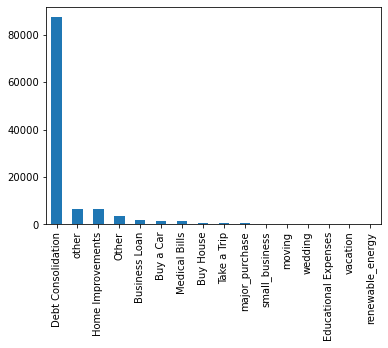

In [22]:
object_type_count(lpd,'Purpose')

Debt consolidation contains more than half of the proportion of the categories.
This feature will be dropped due to the bias it contains.

Home Mortgage    53818
Rent             46868
Own Home         10188
HaveMortgage       233
Name: Home Ownership, dtype: int64
Home Mortgage    0.484380
Rent             0.421828
Own Home         0.091695
HaveMortgage     0.002097
Name: Home Ownership, dtype: float64


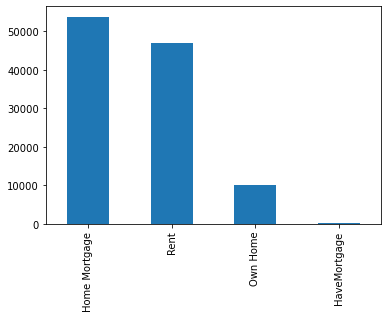

In [23]:
object_type_count(lpd,'Home Ownership')

In [24]:
numerical_variables = lpd.select_dtypes(include = np.number)
numerical_variables

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,12232,7280.0,1.0,46643.0,777.39,18.0,10.0,12,0,6762,7946.0,0.0,0.0
1,25014,7330.0,10.0,81099.0,892.09,26.7,NaN,14,0,35706,77961.0,0.0,0.0
2,16117,7240.0,9.0,60438.0,1244.02,16.7,32.0,11,1,11275,14815.0,1.0,0.0
3,11716,7400.0,3.0,34171.0,990.94,10.0,NaN,21,0,7009,43533.0,0.0,0.0
4,9789,6860.0,10.0,47003.0,503.71,16.7,25.0,13,1,16913,19553.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111102,15654,686.0,10.0,43050.0,889.69,14.1,49.0,18,0,14730,29757.0,0.0,0.0
111103,15237,706.0,10.0,60948.0,700.90,15.9,48.0,11,0,17733,23060.0,0.0,0.0
111104,10413,719.0,5.0,66945.0,1210.59,8.7,NaN,11,0,5205,6348.0,0.0,0.0
111105,34447,626.0,10.0,78736.0,1476.30,30.4,9.0,12,0,32318,37580.0,0.0,0.0


In [25]:
cor = numerical_variables.corr().abs()
cor

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,0.096565,0.001897,0.010673,0.010440,0.018193,0.009815,0.000084,0.001904,0.001862,0.001424,0.000676,0.000127
Credit Score,0.096565,1.000000,0.005879,0.019999,0.003228,0.010127,0.002741,0.005579,0.001948,0.001758,0.003071,0.005786,0.005155
Years in current job,0.001897,0.005879,1.000000,0.079529,0.129979,0.227092,0.003213,0.052004,0.039682,0.098356,0.002146,0.040744,0.013010
Annual Income,0.010673,0.019999,0.079529,1.000000,0.491350,0.163397,0.075919,0.148766,0.015702,0.311503,0.053650,0.048532,0.042600
Monthly Debt,0.010440,0.003228,0.129979,0.491350,1.000000,0.199040,0.054496,0.411867,0.053780,0.480299,0.040756,0.079225,0.022274
Years of Credit History,0.018193,0.010127,0.227092,0.163397,0.199040,1.000000,0.042866,0.132027,0.062915,0.207137,0.032039,0.066311,0.019959
Months since last delinquent,0.009815,0.002741,0.003213,0.075919,0.054496,0.042866,1.000000,0.032356,0.105628,0.027322,0.009639,0.126004,0.011661
Number of Open Accounts,0.000084,0.005579,0.052004,0.148766,0.411867,0.132027,0.032356,1.000000,0.013996,0.227014,0.032530,0.024052,0.006841
Number of Credit Problems,0.001904,0.001948,0.039682,0.015702,0.053780,0.062915,0.105628,0.013996,1.000000,0.111938,0.012652,0.752255,0.585772
Current Credit Balance,0.001862,0.001758,0.098356,0.311503,0.480299,0.207137,0.027322,0.227014,0.111938,1.000000,0.142420,0.122544,0.015476


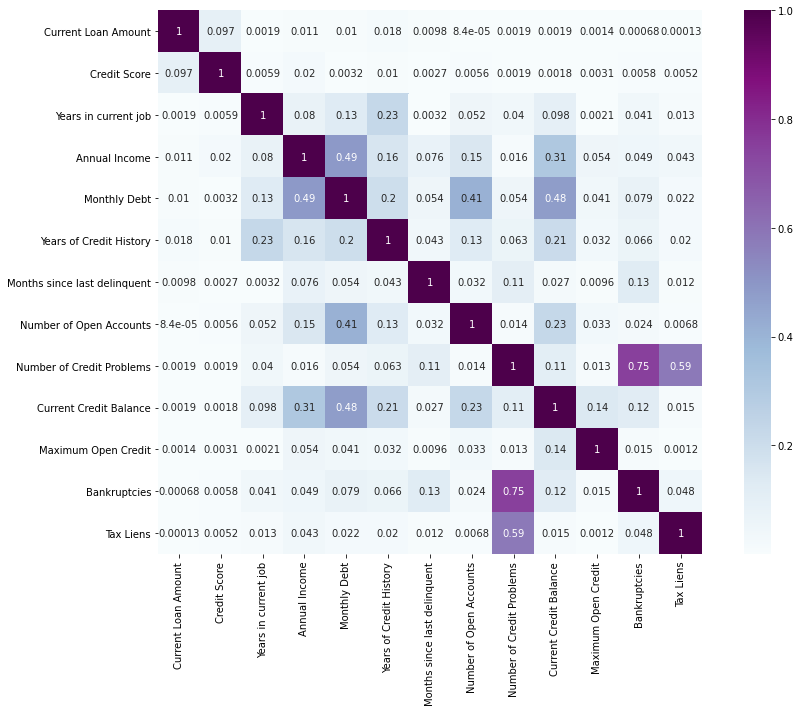

In [26]:
plt.figure(figsize = (15,10))
sns.heatmap(cor, vmax = 1, square = True,cmap = 'BuPu', annot = True)
plt.show()

From the heatmap above, it can be seen that some features are correlated. This means they serve a similar purpose in the dataset. However, one of these columns will be dropped

### Dropping unwanted columns

Definning a function to help drop features. Some features will be dropped based on their significance on the outcome of the work. Others will be dropped based on the bias between the categories they contain.

In [27]:
def column_drop(lpd, feature_name):
    """
    This function will aid in dropping or removing columns that will
    not be used in this work.
    INPUT: impute data frame and name of the feature to be dropped
    OUTPUT: specified feature will be dropped
    """
    
    
    lpd.drop(feature_name, axis = 1, inplace = True)

In [28]:
column_drop(lpd,'Loan ID')
column_drop(lpd,'Customer ID')
column_drop(lpd,'Bankruptcies') # Dropped because of the correlation between Bankruptcies and Number of credit problems
column_drop(lpd, 'Tax Liens')
column_drop(lpd, 'Purpose')
column_drop(lpd, 'Home Ownership')

#### INSPECTING OUTLIERS IN NUMERICAL FEATURES

In [29]:
def outlier_check(lpd,feature_name):

    sns.boxplot(lpd[feature_name], orient = 'v')
    plt.show()

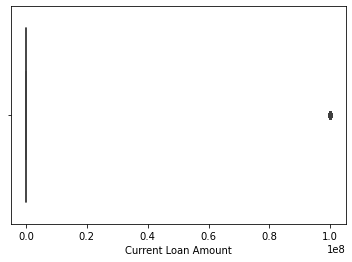

In [30]:
outlier_check(lpd,'Current Loan Amount')

 Mean and Standard deviation based approach: keep values that fall within the range of (mean -3 * std) and (mean +3 * std)

In [31]:
mean_ = lpd['Current Loan Amount'].mean()

std_ = lpd['Current Loan Amount'].std()

cut_off =std_*3

lower,upper = mean_-std_ , mean_+std_

In [32]:
std_method = (lpd['Current Loan Amount']<upper)& (lpd['Current Loan Amount']>lower)

In [33]:
std_method = lpd['Current Loan Amount'][(lpd['Current Loan Amount']<upper)& (lpd['Current Loan Amount']>lower)]

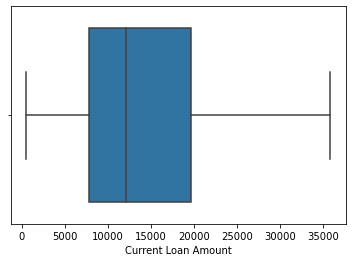

In [34]:
sns.boxplot(std_method,orient = 'v')
plt.show()

In [35]:
lpd['Current Loan Amount'] = std_method

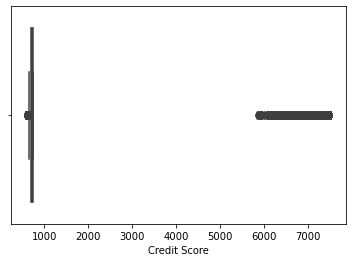

In [36]:
outlier_check(lpd,'Credit Score')

In [37]:
mean_ = lpd['Credit Score'].mean()

std_ = lpd['Credit Score'].std()

cut_off =std_*3

lower,upper = mean_-std_ , mean_+std_

In [38]:
std_method = (lpd['Credit Score']<upper)& (lpd['Credit Score']>lower)

In [39]:
std_method = lpd['Credit Score'][(lpd['Credit Score']<upper)&(lpd['Credit Score']>lower)]

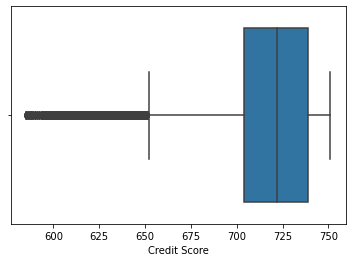

In [40]:
sns.boxplot(std_method,orient = 'v')
plt.show()

In [41]:
lpd['Credit Score'] = std_method

<AxesSubplot:xlabel='Years in current job'>

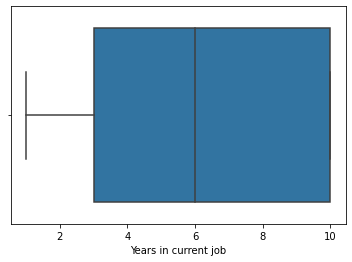

In [42]:
sns.boxplot(lpd['Years in current job'],orient = 'v')

In [43]:
mean_ = lpd['Years in current job'].mean()

std_ = lpd['Years in current job'].std()

cut_off =std_*3

lower,upper = mean_-std_ , mean_+std_


std_method = (lpd['Years in current job']<upper)& (lpd['Years in current job']>lower)
std_method = lpd['Years in current job'][(lpd['Years in current job']<upper)&(lpd['Years in current job']>lower)]


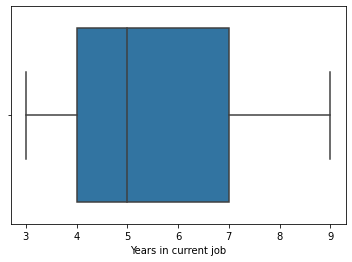

In [44]:
sns.boxplot(std_method,orient = 'v')
plt.show()

In [45]:
lpd['Years in current job'] = std_method

<AxesSubplot:xlabel='Annual Income'>

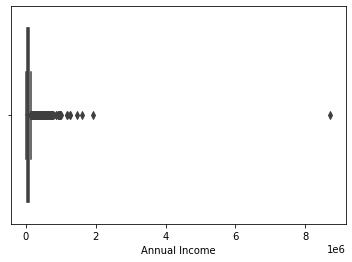

In [46]:
sns.boxplot(lpd['Annual Income'], orient = 'v')

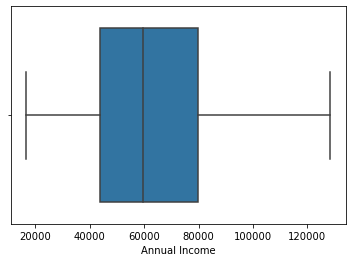

In [47]:
mean_ = lpd['Annual Income'].mean()

std_ = lpd['Annual Income'].std()

cut_off =std_*3

lower,upper = mean_-std_ , mean_+std_


std_method = (lpd['Annual Income']<upper)& (lpd['Annual Income']>lower)
std_method = lpd['Annual Income'][(lpd['Annual Income']<upper)&(lpd['Annual Income']>lower)]

sns.boxplot(std_method,orient = 'v')
plt.show()


In [48]:
lpd['Annual Income'] = std_method

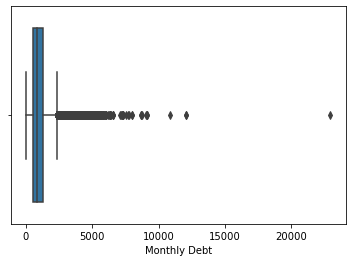

In [49]:
outlier_check(lpd,'Monthly Debt')

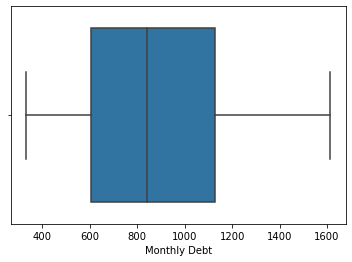

In [50]:
mean_ = lpd['Monthly Debt'].mean()

std_ = lpd['Monthly Debt'].std()

cut_off =std_*3

lower,upper = mean_-std_ , mean_+std_


std_method = (lpd['Monthly Debt']<upper)& (lpd['Monthly Debt']>lower)
std_method = lpd['Monthly Debt'][(lpd['Monthly Debt']<upper)&(lpd['Monthly Debt']>lower)]

sns.boxplot(std_method,orient = 'v')
plt.show()


In [51]:
lpd['Monthly Debt'] = std_method

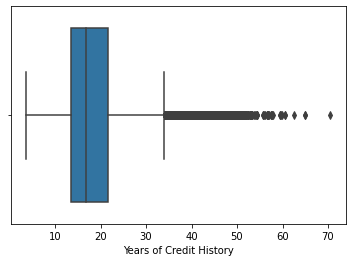

In [52]:
outlier_check(lpd,'Years of Credit History')

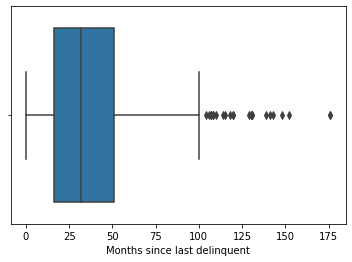

In [53]:
outlier_check(lpd,'Months since last delinquent')

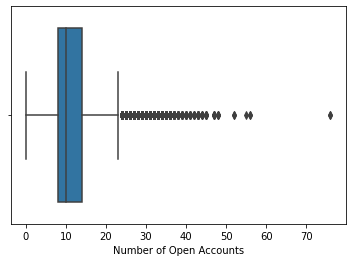

In [54]:
outlier_check(lpd,'Number of Open Accounts')

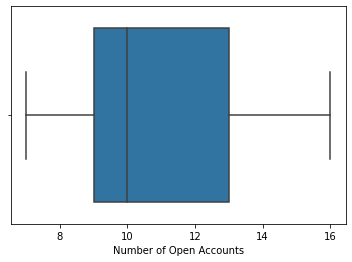

In [55]:
mean_ = lpd['Number of Open Accounts'].mean()

std_ = lpd['Number of Open Accounts'].std()

cut_off =std_*3

lower,upper = mean_-std_ , mean_+std_


std_method = (lpd['Number of Open Accounts']<upper)& (lpd['Number of Open Accounts']>lower)
std_method = lpd['Number of Open Accounts'][(lpd['Number of Open Accounts']<upper)&(lpd['Number of Open Accounts']>lower)]

sns.boxplot(std_method,orient = 'v')
plt.show()


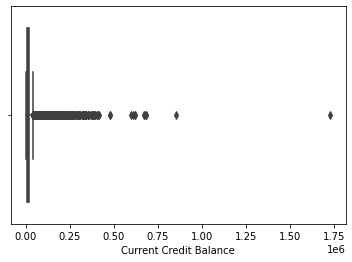

In [56]:
outlier_check(lpd,'Current Credit Balance')

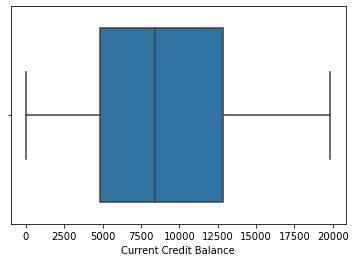

In [57]:
std_ = lpd['Current Credit Balance'].std()

cut_off =std_*3

lower,upper = mean_-std_ , mean_+std_


std_method = (lpd['Current Credit Balance']<upper)& (lpd['Current Credit Balance']>lower)
std_method = lpd['Current Credit Balance'][(lpd['Current Credit Balance']<upper)&(lpd['Current Credit Balance']>lower)]

sns.boxplot(std_method,orient = 'v')
plt.show()

In [58]:
lpd['Current Credit Balance'] = std_method

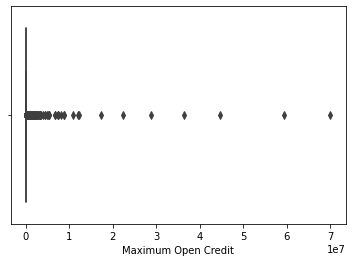

In [59]:
outlier_check(lpd,'Maximum Open Credit')

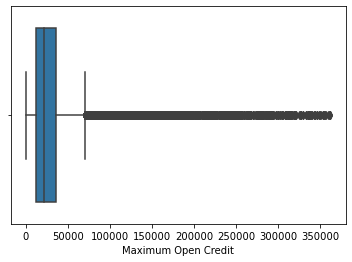

In [60]:
std_ = lpd['Maximum Open Credit'].std()

cut_off =std_*3

lower,upper = mean_-std_ , mean_+std_


std_method = (lpd['Maximum Open Credit']<upper)& (lpd['Maximum Open Credit']>lower)
std_method = lpd['Maximum Open Credit'][(lpd['Maximum Open Credit']<upper)&(lpd['Maximum Open Credit']>lower)]

sns.boxplot(std_method,orient = 'v')
plt.show()

In [61]:
lpd['Maximum Open Credit'] = std_method

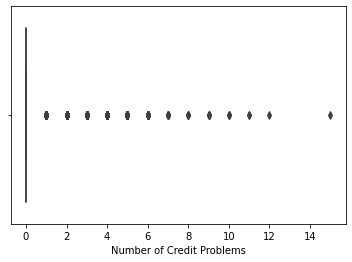

In [62]:
outlier_check(lpd,'Number of Credit Problems')

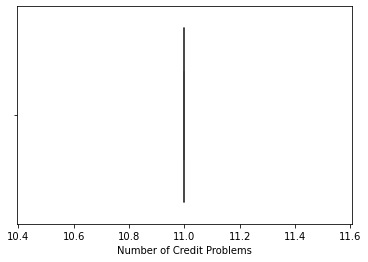

In [63]:
std_ = lpd['Number of Credit Problems'].std()

cut_off =std_*3

lower,upper = mean_-std_ , mean_+std_


std_method = (lpd['Number of Credit Problems']<upper)& (lpd['Number of Credit Problems']>lower)
std_method = lpd['Number of Credit Problems'][(lpd['Number of Credit Problems']<upper)&(lpd['Number of Credit Problems']>lower)]

sns.boxplot(std_method,orient = 'v')
plt.show()

In [64]:
lpd['Number of Credit Problems']=std_method

In [65]:
lpd.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit
0,Loan Refused,12232.0,Short Term,NaN,NaN,46643.0,777.39,18.0,10.0,12,NaN,6762.0,7946.0
1,Loan Refused,25014.0,Long Term,NaN,NaN,81099.0,892.09,26.7,NaN,14,NaN,NaN,77961.0
2,Loan Refused,16117.0,Short Term,NaN,9.0,60438.0,1244.02,16.7,32.0,11,NaN,11275.0,14815.0
3,Loan Refused,11716.0,Short Term,NaN,3.0,34171.0,990.94,10.0,NaN,21,NaN,7009.0,43533.0
4,Loan Refused,9789.0,Long Term,NaN,NaN,47003.0,503.71,16.7,25.0,13,NaN,16913.0,19553.0


In [66]:
lpd.isnull().sum()

Loan Status                          0
Current Loan Amount              12738
Term                                 0
Credit Score                     26382
Years in current job             65632
Annual Income                    29011
Monthly Debt                     27204
Years of Credit History              0
Months since last delinquent     59003
Number of Open Accounts              0
Number of Credit Problems       111105
Current Credit Balance           26713
Maximum Open Credit                371
dtype: int64

### Checking for variables with missing data less than 30%
In this work only columns with 30% missing values will be tolerated.

In [67]:
lpd_mask = lpd.isnull().sum()/len(lpd)<.3
lpd_mask

Loan Status                      True
Current Loan Amount              True
Term                             True
Credit Score                     True
Years in current job            False
Annual Income                    True
Monthly Debt                     True
Years of Credit History          True
Months since last delinquent    False
Number of Open Accounts          True
Number of Credit Problems       False
Current Credit Balance           True
Maximum Open Credit              True
dtype: bool

### Removing columns with more than 30% from the data
'Months since last deliquent' and 'Years in current job' will be removed from the dataset since it has more than 30% missing values.

In [68]:
lpd = lpd.loc[:,lpd_mask]

In [69]:
for col in lpd.columns:
    print(col)

Loan Status
Current Loan Amount
Term
Credit Score
Annual Income
Monthly Debt
Years of Credit History
Number of Open Accounts
Current Credit Balance
Maximum Open Credit


In [70]:
lpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan Status              111107 non-null  object 
 1   Current Loan Amount      98369 non-null   float64
 2   Term                     111107 non-null  object 
 3   Credit Score             84725 non-null   float64
 4   Annual Income            82096 non-null   float64
 5   Monthly Debt             83903 non-null   float64
 6   Years of Credit History  111107 non-null  float64
 7   Number of Open Accounts  111107 non-null  int64  
 8   Current Credit Balance   84394 non-null   float64
 9   Maximum Open Credit      110736 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 8.5+ MB


In [71]:
lpd.isnull().sum()

Loan Status                    0
Current Loan Amount        12738
Term                           0
Credit Score               26382
Annual Income              29011
Monthly Debt               27204
Years of Credit History        0
Number of Open Accounts        0
Current Credit Balance     26713
Maximum Open Credit          371
dtype: int64

There are six more columns with missing values in the above information. In this work, these missing values will be replaced with the mean of the entire column where they belong.

In [72]:
lpd['Current Loan Amount'].fillna(lpd['Current Loan Amount'].mean(), inplace = True)
lpd['Credit Score'].fillna(lpd['Credit Score'].mean(), inplace = True)
lpd['Annual Income'].fillna(lpd['Annual Income'].mean(), inplace = True)
lpd['Monthly Debt'].fillna(lpd['Monthly Debt'].mean(), inplace = True)
lpd['Current Credit Balance'].fillna(lpd['Current Credit Balance'].mean(), inplace = True)
lpd['Maximum Open Credit'].fillna(lpd['Maximum Open Credit'].mean(), inplace = True)

In [73]:
lpd.isnull().sum()

Loan Status                0
Current Loan Amount        0
Term                       0
Credit Score               0
Annual Income              0
Monthly Debt               0
Years of Credit History    0
Number of Open Accounts    0
Current Credit Balance     0
Maximum Open Credit        0
dtype: int64

In [74]:
def dist_plot(lpd,feature_name):
    

    sns.distplot(lpd[feature_name])
    plt.show()

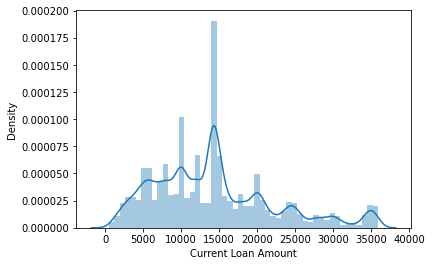

In [75]:
dist_plot(lpd,'Current Loan Amount')

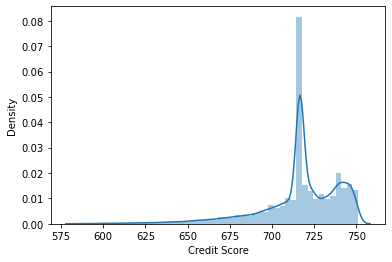

In [76]:
dist_plot(lpd,'Credit Score')

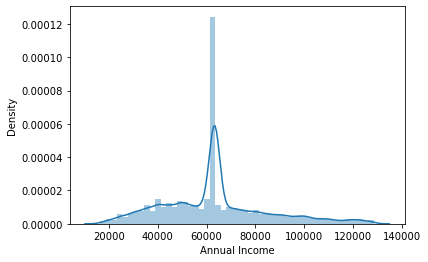

In [77]:
dist_plot(lpd,'Annual Income')

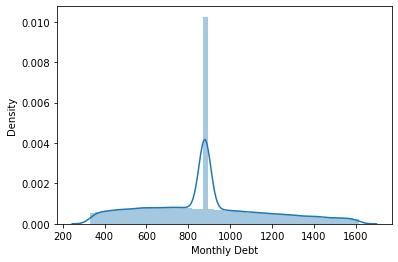

In [78]:
dist_plot(lpd,'Monthly Debt')

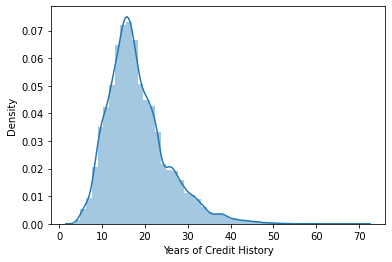

In [79]:
dist_plot(lpd,'Years of Credit History')

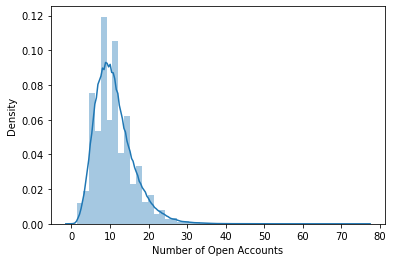

In [80]:
dist_plot(lpd,'Number of Open Accounts')

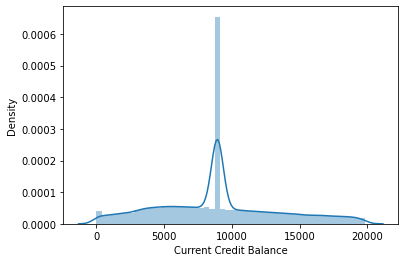

In [81]:
dist_plot(lpd,'Current Credit Balance')

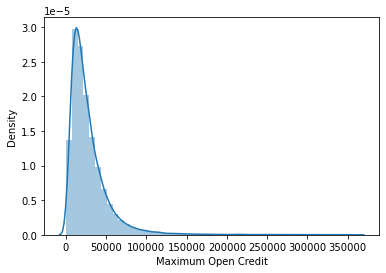

In [82]:
dist_plot(lpd,'Maximum Open Credit')

###  Encoding categorical variable
Machine learning models require all input and output variables to be numeric. This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model.
The performance of a machine learning model not only depends on the model and the hyperparameters but also on how we process and feed different types of variables to the model. We need to convert these categorical variables to numbers such that the model is able to understand and extract valuable information.

In [83]:
term_dummies = pd.get_dummies(lpd.Term)
lpd = pd.concat([lpd,term_dummies],axis = 1)

In [84]:
lpd

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Long Term,Short Term
0,Loan Refused,12232.0,Short Term,716.612735,46643.0,777.39,18.0,12,6762.000000,7946.0,0,1
1,Loan Refused,25014.0,Long Term,716.612735,81099.0,892.09,26.7,14,8927.561687,77961.0,1,0
2,Loan Refused,16117.0,Short Term,716.612735,60438.0,1244.02,16.7,11,11275.000000,14815.0,0,1
3,Loan Refused,11716.0,Short Term,716.612735,34171.0,990.94,10.0,21,7009.000000,43533.0,0,1
4,Loan Refused,9789.0,Long Term,716.612735,47003.0,503.71,16.7,13,16913.000000,19553.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
111102,Loan Given,15654.0,Long Term,686.000000,43050.0,889.69,14.1,18,14730.000000,29757.0,1,0
111103,Loan Given,15237.0,Short Term,706.000000,60948.0,700.90,15.9,11,17733.000000,23060.0,0,1
111104,Loan Given,10413.0,Short Term,719.000000,66945.0,1210.59,8.7,11,5205.000000,6348.0,0,1
111105,Loan Given,34447.0,Short Term,626.000000,78736.0,1476.30,30.4,12,8927.561687,37580.0,0,1


In [85]:
column_drop(lpd,'Term')

In [86]:
lpd.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Long Term,Short Term
0,Loan Refused,12232.0,716.612735,46643.0,777.39,18.0,12,6762.000000,7946.0,0,1
1,Loan Refused,25014.0,716.612735,81099.0,892.09,26.7,14,8927.561687,77961.0,1,0
2,Loan Refused,16117.0,716.612735,60438.0,1244.02,16.7,11,11275.000000,14815.0,0,1
3,Loan Refused,11716.0,716.612735,34171.0,990.94,10.0,21,7009.000000,43533.0,0,1
4,Loan Refused,9789.0,716.612735,47003.0,503.71,16.7,13,16913.000000,19553.0,1,0


In [87]:
lpd['Loan Status'].replace(['Loan Refused','Loan Given'],[0,1], inplace =True)

In [88]:
lpd.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Long Term,Short Term
0,0,12232.0,716.612735,46643.0,777.39,18.0,12,6762.000000,7946.0,0,1
1,0,25014.0,716.612735,81099.0,892.09,26.7,14,8927.561687,77961.0,1,0
2,0,16117.0,716.612735,60438.0,1244.02,16.7,11,11275.000000,14815.0,0,1
3,0,11716.0,716.612735,34171.0,990.94,10.0,21,7009.000000,43533.0,0,1
4,0,9789.0,716.612735,47003.0,503.71,16.7,13,16913.000000,19553.0,1,0


### Scaling Data
Scaling the entire dataset will cause data leakage. That is outcome of target variable will be leaked. Therefore scaling will be done on the data without the target variable to avoid leakage of information. 

In [89]:
X = lpd.drop('Loan Status', axis = 1)
y = lpd['Loan Status']

Independent variables are represented by X in the above code, while y represents the the target variable. This is done in order to seperate the target variable from the independent varibales before scaling 

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler()
norm_data = scaler.fit_transform(X)
X = pd.DataFrame(norm_data, columns = X.columns)

X.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Long Term,Short Term
0,-0.244975,0.0,-0.764743,-0.350846,-0.028655,0.174621,-4.840663e-01,-0.734266,-0.619756,0.619756
1,1.360755,0.0,0.823269,0.046409,1.211639,0.573803,4.065973e-16,1.780280,1.613539,-1.613539
2,0.243075,0.0,-0.128957,1.265294,-0.213987,-0.024970,5.247210e-01,-0.487570,-0.619756,0.619756
3,-0.309797,0.0,-1.339554,0.388769,-1.169156,1.970941,-4.288546e-01,0.543820,-0.619756,0.619756
4,-0.551876,0.0,-0.748151,-1.298718,-0.213987,0.374212,1.784979e+00,-0.317407,1.613539,-1.613539


In [92]:
given = lpd[lpd['Loan Status']==1]
refused = lpd[lpd['Loan Status']==0]

In [93]:
print('shape of ones')
print(given.shape)
print('Shape of zeros')
print(refused.shape)   
# Checking the number of zeros and ones, it can be seen that the number of ones are more than the number of zeros.
# This makes the target variable imbalanced which may cause a certain level of bias when fitting a model. 

shape of ones
(85934, 11)
Shape of zeros
(25173, 11)


### Making the target variable balanced

In [94]:
import imblearn
from imblearn.over_sampling import ADASYN

In [95]:
X_resampled,y_resampled = ADASYN().fit_resample(X,y)

In [96]:
X_resampled.shape,y_resampled.shape

((170475, 10), (170475,))

In [97]:
from collections import Counter

In [98]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_resampled)))

Original dataset shape Counter({1: 85934, 0: 25173})
Resampled dataset shape Counter({1: 85934, 0: 84541})


In [99]:
X = X_resampled
y = y_resampled

In [100]:
print(X.shape,y.shape)

(170475, 10) (170475,)


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

### Splitting data into train and test sets
The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.





Here different models will be used to train and test the data set in order to know best model. Different scoring metrices will be used as well to help select the best model. Various scores of matrices for the different models will be compared with each other to know the best out of the lot.



Data will be splitted 70%-30% for train set and test set respectively

In [102]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,
                                                     test_size = 0.3)

### Matrices for evaluation performance of the models in the work
Three different matrices will be used to evaluate the performance of the models. they are;
1. Confusion Matrix
2. F1 score
3. Roc Auc Score

#### Confusion Matrix
A confusion matrix is a technique for summarizing the performance of a classification algorithm.The number of correct and incorrect predictions are summarized with count values and broken down by each class.


#### F1 score
F1-score is a metric which takes into account both precision and recall and is defined as follows: F1 Score becomes 1 only when precision and recall are both 1. F1 score becomes high only when both precision and recall are high

#### Roc Auc Score
The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.When AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly. If, however, the AUC had been 0, then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives.

In [103]:
# Gradient Boost
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
pred_gbc = gbc.predict(X_test)
train_gbc = round(gbc.score(X_train,y_train)*100)
test_gbc = round(gbc.score(X_test,y_test)*100)

gbc_conf_matrix = confusion_matrix(y_test,pred_gbc)
score_gbc = round(f1_score(y_test,pred_gbc)*100)
gbc_r_a_score = round(roc_auc_score(y_test,pred_gbc)*100)

print('===============================================')
print('TRAIN SET')
print(train_gbc)
print('===============================================')
print('TEST SET')
print(test_gbc)
print('===============================================')
print('CONFUSION MATRIX')
print(gbc_conf_matrix)
print('===============================================')
print('F1 SCORE')
print(score_gbc)
print('===============================================')
print('ROC AUC SCORE')
print(gbc_r_a_score)
print('===============================================')

TRAIN SET
78
TEST SET
78
CONFUSION MATRIX
[[17687  7676]
 [ 3507 22273]]
F1 SCORE
80
ROC AUC SCORE
78


In [104]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)
pred_logreg = logreg.predict(X_test)

logreg_train = round(logreg.score(X_train,y_train)*100)
logreg_test = round(logreg.score(X_test,y_test)*100)

logreg_conf_matrix = confusion_matrix(y_test,pred_logreg)
score_logreg = round(f1_score(y_test,pred_logreg)*100)
logreg_r_a_score = round(roc_auc_score(y_test,pred_logreg)*100)


print('==============================================')
print('TRAIN SET')
print(logreg_train,'%')
print('==============================================')
print('TEST SET')
print(logreg_test,'%')
print('==============================================')
print('CONFUSION MATRIX')
print(logreg_conf_matrix)
print('==============================================')
print('F1 SCORE')
print(score_logreg,'%')
print('==============================================')
print('ROC AUC SCORE')
print(logreg_r_a_score,'%')
print('==============================================')




TRAIN SET
56 %
TEST SET
56 %
CONFUSION MATRIX
[[13001 12362]
 [10191 15589]]
F1 SCORE
58 %
ROC AUC SCORE
56 %


In [105]:
# AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
pred_abc = abc.predict(X_test)

abc_train = round(abc.score(X_train,y_train)*100)
abc_test = round(abc.score(X_test,y_test)*100)


abc_conf_matrix = confusion_matrix(y_test,pred_abc)
score_abc = round(f1_score(y_test,pred_abc)*100)
abc_r_a_score = round(roc_auc_score(y_test,pred_abc)*100)



print('============================================')
print('TRAIN SET')
print(abc_train)
print('==============================================')
print('TEST SET')
print(abc_test,'%')
print('============================================')
print('CONFUSION MATRIC')
print(abc_conf_matrix)
print('============================================')
print('F1 SCORE')
print(score_abc,'%')
print('============================================')
print('ROC AUC SCORE')
print(print(abc_r_a_score,'%'))
print('============================================')

TRAIN SET
66
TEST SET
66 %
CONFUSION MATRIC
[[18366  6997]
 [10315 15465]]
F1 SCORE
64 %
ROC AUC SCORE
66 %
None


In [106]:
#Gaussian NB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
pred_gnb = gnb.predict(X_test)


gnb_train = round(gnb.score(X_train,y_train)*100)
gnb_test = round(gnb.score(X_test,y_test)*100)

gnb_conf_matrix = confusion_matrix(y_test,pred_gnb)
score_gnb = round(f1_score(y_test,pred_gnb)*100)
gnb_r_a_score = round(roc_auc_score(y_test,pred_gnb)*100)



print('===========================================')
print('TRAIN SET')
print(gnb_train,'%')
print('===========================================')
print('TEST SET')
print(gnb_test,'%')
print('===========================================')
print('CONFUSION MATRIX')
print(gnb_conf_matrix)
print('===========================================')
print('F1 SCORE')
print(score_gnb,'%')
print('===========================================')
print('ROC AUC SCORE')
print(gnb_r_a_score,'%')
print('===========================================')

TRAIN SET
55 %
TEST SET
55 %
CONFUSION MATRIX
[[10478 14885]
 [ 8047 17733]]
F1 SCORE
61 %
ROC AUC SCORE
55 %


In [108]:
results = pd.DataFrame({
    'Model':['Gradient Boosting Classifier','Logistic Regression','AdaBoost Classifier',
            'Gaussian NB'],
    'Train set':[train_gbc,logreg_train,abc_train,gnb_train],
    'Test set':[test_gbc, logreg_test,abc_test,gnb_test],
    'F1 Score':[score_gbc,score_logreg,score_abc,score_gnb],
    'Roc Auc score':[gbc_r_a_score, logreg_r_a_score,abc_r_a_score,gnb_r_a_score]
})
results_df = results.sort_values(by = 'Test set',ascending = False)
result_df = results_df.set_index('Model')
result_df

,Train set,Test set,F1 Score,Roc Auc score
Model,,,,
Gradient Boosting Classifier,78,78,80,78
AdaBoost Classifier,66,66,64,66
Logistic Regression,56,56,58,56
Gaussian NB,55,55,61,55


### Plotting the auc for all the above models

In [109]:
# GRADIENT BOOSTING CLASSIFIER
gbc_probs = gbc.predict_proba(X_test)
pred_gbc = gbc_probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_gbc)
gbc_roc_auc = round(metrics.auc(fpr, tpr)*100)
print('Roc auc for Gradient Boosting Classifier is: {:.2f} %'.format(gbc_roc_auc))

Roc auc for Gradient Boosting Classifier is: 87.00 %


In [110]:
abc_probs = abc.predict_proba(X_test)
pred_abc = abc_probs[:,1]
fpr1, tpr1, threshold = metrics.roc_curve(y_test, pred_abc)
abc_roc_auc = round(metrics.auc(fpr1, tpr1)*100)
print('Roc auc for AdaBoost Classifier is: {:.2f} %'.format(abc_roc_auc))

Roc auc for AdaBoost Classifier is: 75.00 %


In [111]:
logreg_probs = logreg.predict_proba(X_test)
pred_logreg = logreg_probs[:,1]
fpr2, tpr2, threshold = metrics.roc_curve(y_test, pred_logreg)
logreg_roc_auc = round(metrics.auc(fpr2, tpr2)*100)
print('Roc auc for Logistic Regression is: {:.2f} %'.format(logreg_roc_auc))

Roc auc for Logistic Regression is: 59.00 %


In [112]:
# GAUSSIAN NB
gnb_probs = gnb.predict_proba(X_test)
pred_gnb = gnb_probs[:,1]
fpr3, tpr3, threshold = metrics.roc_curve(y_test, pred_gnb)
gnb_roc_auc = round(metrics.auc(fpr3, tpr3)*100)
print('Roc auc for Gaussian NB is: {:.2f} %'.format(gnb_roc_auc))

Roc auc for Gaussian NB is: 59.00 %


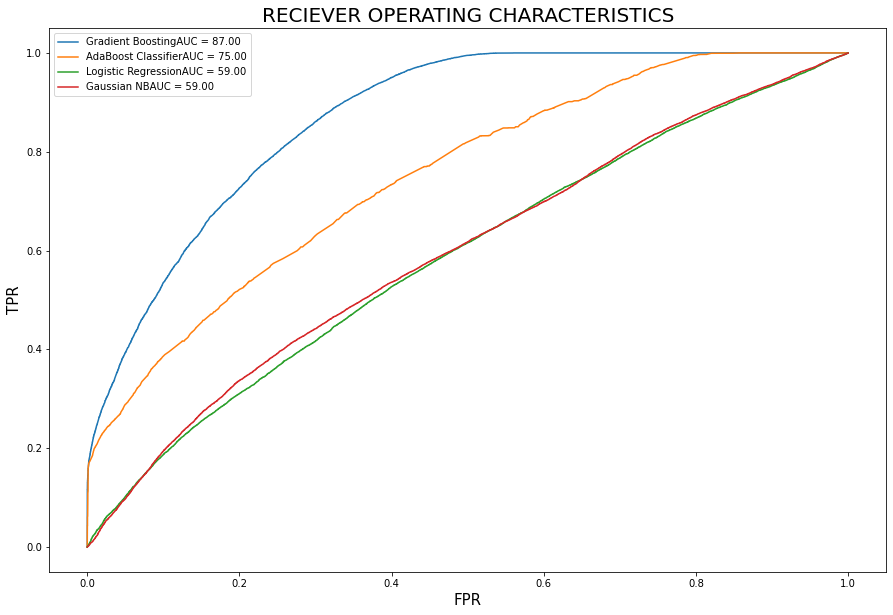

In [113]:
plt.figure(figsize = (15,10))
plt.plot(fpr,tpr, label ='Gradient Boosting' 'AUC = %0.2f' % gbc_roc_auc)
plt.plot(fpr1,tpr1, label = 'AdaBoost Classifier' 'AUC = %0.2f' % abc_roc_auc)
plt.plot(fpr2,tpr2, label = 'Logistic Regression' 'AUC = %0.2f' % logreg_roc_auc)
plt.plot(fpr3,tpr3, label = 'Gaussian NB' 'AUC = %0.2f' % gnb_roc_auc)
plt.legend(loc = 'best')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('RECIEVER OPERATING CHARACTERISTICS', fontsize = 20)
plt.show()

Gradient Boosting appears to be the best model with both train set and test set scores better than the others.
Its f1 score and roc auc score is also better than that of the others. Confusion matrix for Gradient Boosting also predicts more true positives and true negatives than the other models.

I will be training the data again on the Gradient Boosting model. This time some hyperparameters will be included to enhance the models performance.

Let's see how that goes!

In [114]:
gbc = GradientBoostingClassifier(learning_rate= 0.1, max_depth = 3, n_estimators = 1000, subsample = 0.5)
gbc.fit(X_train,y_train)
pred_gbc = gbc.predict(X_test)
train_gbc = round(gbc.score(X_train,y_train)*100)
test_gbc = round(gbc.score(X_test,y_test)*100)

gbc_conf_matrix = confusion_matrix(y_test,pred_gbc)
score_gbc = round(f1_score(y_test,pred_gbc)*100)
gbc_r_a_score = round(roc_auc_score(y_test,pred_gbc)*100)

print('===============================================')
print('TRAIN SET')
print(train_gbc)
print('===============================================')
print('TEST SET')
print(test_gbc)
print('===============================================')
print('CONFUSION MATRIX')
print(gbc_conf_matrix)
print('===============================================')
print('F1 SCORE')
print(score_gbc)
print('===============================================')
print('ROC AUC SCORE')
print(gbc_r_a_score)
print('===============================================')

TRAIN SET
86
TEST SET
85
CONFUSION MATRIX
[[18558  6805]
 [  972 24808]]
F1 SCORE
86
ROC AUC SCORE
85


After tuning a few hyperparameters it can be seen that the model performs even better than it did initially.

Plotting the roc auc to know how well the model is at classifying.

In [115]:
gbc_probs = gbc.predict_proba(X_test)
pred_gbc = gbc_probs[:,1]
fpr5, tpr5, threshold = metrics.roc_curve(y_test, pred_gbc)
gbc_roc_auc = round(metrics.auc(fpr5, tpr5)*100)
print('Roc auc for Gradient Boosting Classifier is: {:.2f} %'.format(gbc_roc_auc))

Roc auc for Gradient Boosting Classifier is: 92.00 %


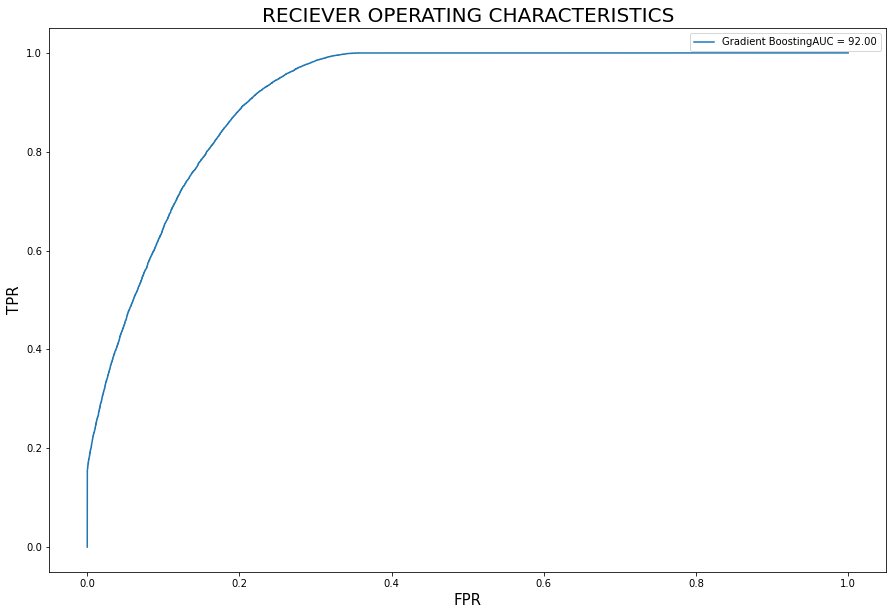

In [116]:
plt.figure(figsize = (15,10))
plt.plot(fpr5,tpr5, label ='Gradient Boosting' 'AUC = %0.2f' % gbc_roc_auc)
plt.legend(loc = 'best')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('RECIEVER OPERATING CHARACTERISTICS', fontsize = 20)
plt.show()

An excellent model has AUC near to the 1 which means it has a good measure of separability.
A poor model has an AUC near 0 which means it has the worst measure of separability. In fact, it means it is reciprocating the result. It is predicting 0s as 1s and 1s as 0s. And when AUC is 0.5, it means the model has no class separation capacity whatsoever.


A 92% AUC is actually good score for the model. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between customers who were given loans and customers who were refused.

# Conclusion
​
This project has given me in-depht knowlegde on how  some machine learning algorithms work and has also helped me apply concepts learned in class, and other sources on different type of problem. Most of the time spent on this project was during the data preparation aspect.
​

This projected started with importation of basic python libraries and also data exploration. This gave an overview of how the data looked like. Fished out missing values and stray characters and also checked which features were important to the objectives of the work.
​

During the preprocessing stage, missing values were computed, some features were converted to numeric ones, and encoded categorical features. The standard scaler was used to scale the data and the target variable was also balanced.
​

Four different models were used in this project.The Accuracy score,Confusion matrix, Roc Auc scores and F1 score were matrices used for the evaluation of the Gradient Boosting Classifier that proved to be the best of the models.